In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from matplotlib import style
from collections import Counter
style.use('fivethirtyeight')
import pandas as pd
import random

In [5]:
df=pd.read_csv('breast-cancer-wisconsin.data.txt')
df.replace('?',-99999,inplace = True )
df.drop((['id']),1,inplace=True)
full_data=df.astype(float).values.tolist()


In [6]:
random.shuffle(full_data)       #to shuffle the data so that we get all labels in both training as well as training data
test_size=0.2              
train_set={2:[],4:[]}        #dictionary for train_set(it'll have both unique labels(2 and 4))
test_set={2:[],4:[]}              #dictionary for test_set(it'll have both unique labels(2 and 4))

train_data=full_data[:-int(test_size*len(full_data))]        
# or train_data=full_data[:(int(len(full_data))-int((test_size*len(full_data))))]
test_data=full_data[-int(test_size*len(full_data)):]

In [7]:
for i in train_data:                             #insering values from train_data to train_set dictionary
    train_set[i[-1]].append(i[:-1])
    
for i in test_data:                              #insering values from test_data to test_set dictionary
    test_set[i[-1]].append(i[:-1])

In [8]:
test_set

{2: [[5.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [6.0, 1.0, 3.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [5.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [5.0, 1.0, 3.0, 3.0, 2.0, 2.0, 2.0, 3.0, 1.0],
  [3.0, 2.0, 2.0, 3.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [4.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 1.0, 1.0],
  [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [5.0, 2.0, 2.0, 2.0, 3.0, 1.0, 1.0, 3.0, 1.0],
  [3.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [3.0, 2.0, 2.0, 1.0, 2.0, 1.0, 2.0, 3.0, 1.0],
  [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 2.0, 1.0],
  [5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 7.0],
  [5.0, 2.0, 2.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0],
  [4.0, 1.0, 3.0, 3.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [3.0, 1.0, 1.0,

In [9]:
def k_nearest_neighbors(data,predict,k=3):
    
    if len(data)>=k:
        print("k is set to a a value less than total voting group")
    
    distances=[]
    for group in data:
        for features in data[group]:
            euclidean_distance=np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance,group])
    #print distances        
    #print sorted distances
    #print (sorted (distances)[:k])
    
    votes=[i[1] for i in sorted (distances)[:k]]
   
    vote_result=Counter(votes).most_common(1)[0][0]
    return vote_result

In [10]:
correct=0
total=0
for group in test_set:
    for data in test_set[group]:
        vote=k_nearest_neighbors(train_set,data,k=6)
        if group==vote:
            correct+=1
        total+=1
print("Accuracy", correct/total)

('Accuracy', 0)


In [11]:
a=[1,2,3]
b=[2,4,6]

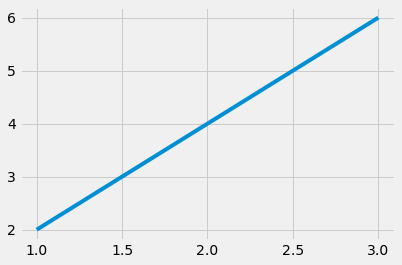

In [12]:
plt.plot(a,b)
plt.show()